IBM Data Analysis with R Final Project
Joyce Mwangi
19-05-2024

In this project, we were tasked with developing a model to predict precipitation based on a few variables. I have created this R markdown to present my results.

# Assignment Scenario

Congratulations! You have just been hired by a US Weather forecast firm as a data scientist.

The company is considering the weather condition to help predict the possibility of precipitations, which involves using various local climatological variables, including temperature, wind speed, humidity, dew point, and pressure. The data you will be handling was collected by a NOAA weather station located at the John F. Kennedy International Airport in Queens, New York.

Your task is to provide a high level analysis of weather data in JFK Airport. Your stakeholders want to understand the current and historical record of precipitations based on different variables. For now they are mainly interested in a macro-view of JFK Airport Weather, and how it relates to the possibility to rain because it will affect flight delays and etc.


# Introduction

This project relates to the NOAA Weather Dataset - JFK Airport (New York). The original dataset contains 114,546 hourly observations of 12 local climatological variables (such as temperature and wind speed) collected at JFK airport.
For this project, you will be using a subset dataset, which contains 5727 rows (about 5% or original rows) and 9 columns. The end goal will be to predict the precipitation using some of the available features.



## Table of Contents:

Tasks
* [0. Import Modules](#cell0)
* [1. Download and Unzip NOAA Weather Dataset](#cell1)
* [2. Read Dataset into Project](#cell2)
* [3. Select Subset of Columns](#cell3)
* [4. Clean Up Columns](#cell4)
* [5. Convert Columns to Numerical Types](#cell5)
* [6. Rename Columns](#cell6)
* [7. Exploratory Data Analysis](#cell7)
* [8. Linear Regression](#cell8)
* [9. Improve the Model](#cell9)
* [10. Find Best Model](#cell10)


<a id="cell0"></a>
## 0. Import required modules

Tidymodels is a collection of packages that use tidyverse principles to easily do the entire modeling process from preprocessing initial data, to creating a model, to tunning hyperparameters. The tidymodels packages can be used to produce high quality statistical and machine learning models.

In [9]:
# Installing required packages
# install.packages("rlang")
# install.packages("tidymodels")

**Note: After installing the packages, restart the kernel. Without installing the packages again, load them. Tidyverse and Tidymodels will be the two main packages you will use.**


In [10]:
#Loading the packages

# Library for modeling
library(tidymodels)

# Load tidyverse
library(tidyverse)

<a id="cell1"></a>

## 1. Downloading the NOAA Weather Dataset
URL = 'https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz'


In [11]:
#Getting the url where the data is located 
url <- "https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz"

#Downloading the file
download.file (url, destfile = "noaa-weather-sample-data.tar.gz")

#Unzipping the zipped file using the untar()
untar ("noaa-weather-sample-data.tar.gz", tar = "internal")


Warning message in untar2(tarfile, files, list, exdir, restore_times):
“using pax extended headers”

<a id="cell2"></a>
## 2. Extracting and Reading the File into the Project


In [12]:
#Reading the CVS file only
library (readr)
NOAA_weather <- read_csv("noaa-weather-sample-data/jfk_weather_sample.csv",
                         col_types = cols(DATE = col_number(),
                                          HOURLYDewPointTempF = col_number()))

#Display the first few rows of the dataframe
head (NOAA_weather)

DATE,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYSeaLevelPressure,HOURLYStationPressure
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2015,60,46,83,68,0.00,13,30.01,29.99
2016,34,48,53,44,0.00,6,30.05,30.03
2013,33,89,36,35,0.00,13,30.14,30.12
2011,18,48,36,30,0.00,14,29.82,29.80
2015,27,61,39,34,T,11,NA,30.50
2013,35,79,41,38,0.00,6,29.94,29.92


Taking a `glimpse` of the dataset to see the different column data types and make sure it is the correct subset dataset with about 5700 rows and 9 columns.


In [13]:
#run dplyr () to use glimpse ()
library (dplyr)
glimpse(NOAA_weather)

Rows: 5,727
Columns: 9
$ DATE                   <dbl> 2015, 2016, 2013, 2011, 2015, 2013, 2014, 2014…
$ HOURLYDewPointTempF    <dbl> 60, 34, 33, 18, 27, 35, 4, 14, 51, 71, 76, 19,…
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44…
$ HOURLYWETBULBTEMPF     <dbl> 68, 44, 35, 30, 34, 38, 15, 21, 52, 72, 78, 35…
$ HOURLYPrecip           <chr> "0.00", "0.00", "0.00", "0.00", "T", "0.00", "…
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17,…
$ HOURLYSeaLevelPressure <dbl> 30.01, 30.05, 30.14, 29.82, NA, 29.94, 30.42, …
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.4…


<a id="cell3"></a>
## 3. Selecting a Subset of Columns

The end goal of this project will be to predict `HOURLYprecip` (precipitation) using a few other variables. Before this, it is important to preprocess the dataset. Section 3 to section 6 focuses on preprocessing.

The first step in preprocessing is to select a subset of data columns and inspect the column types.

The key columns that we will explore in this project are:
- HOURLYRelativeHumidity
- HOURLYDRYBULBTEMPF
- HOURLYPrecip
- HOURLYWindSpeed
- HOURLYStationPressure

Data Glossary:
- 'HOURLYRelativeHumidity' is the relative humidity given to the nearest whole percentage.
- 'HOURLYDRYBULBTEMPF' is the dry-bulb temperature and is commonly used as the standard air temperature reported. It is given here in whole degrees Fahrenheit.
- 'HOURLYPrecip' is the amount of precipitation in inches to hundredths over the past hour. For certain automated stations, precipitation will be reported at sub-hourly intervals (e.g. every 15 or 20 minutes) as an accumulated amount of all precipitation within the preceding hour. A “T” indicates a trace amount of precipitation.
- 'HOURLYWindSpeed' is the speed of the wind at the time of observation given in miles per hour (mph).
- 'HOURLYStationPressure' is the atmospheric pressure observed at the station during the time of observation. Given in inches of Mercury (in Hg).

`Select` those five columns and store the modified dataframe as a new variable.


In [23]:
subset_NOAA_weather <- select (NOAA_weather, c("HOURLYRelativeHumidity", "HOURLYDRYBULBTEMPF", "HOURLYPrecip", "HOURLYWindSpeed", "HOURLYStationPressure"))

Show the first 10 rows of this new dataframe.


In [24]:
#View the first 10 rows of the new dataframe
head (subset_NOAA_weather, n=10)

HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYStationPressure
<dbl>,<dbl>,<chr>,<dbl>,<dbl>
46,83,0.00,13,29.99
48,53,0.00,6,30.03
89,36,0.00,13,30.12
48,36,0.00,14,29.80
61,39,T,11,30.50
79,41,0.00,6,29.92
51,19,0.00,0,30.40
65,24,0.00,11,30.35
90,54,0.06,11,30.03


<a id="cell4"></a>
## 4. Cleaning Up the Columns

From the dataframe preview above, we can see that the column `HOURLYPrecip` - which is the hourly measure of precipitation levels - contains both `NA` and `T` values. `T` specifies *trace amounts of precipitation* (meaning essentially no precipitation), while `NA` means *not available*, and is used to denote missing values. Additionally, some values also have "s" at the end of them, indicating that the precipitation was snow. 

Use the unique$column to see these unique values.


In [25]:
print (unique(subset_NOAA_weather$HOURLYPrecip))

 [1] "0.00"  "T"     "0.06"  NA      "0.03"  "0.02"  "0.08"  "0.01"  "0.07" 
[10] "0.16"  "0.09"  "0.22"  "0.02s" "0.24"  "0.18"  "0.05"  "0.04"  "0.09s"
[19] "0.11"  "0.14"  "0.25"  "0.10"  "0.01s" "0.58"  "0.12"  "0.13"  "0.46" 
[28] "1.07"  "1.19"  "0.34"  "0.20"  "0.36s" "0.42"  "0.17"  "0.27"  "0.35" 
[37] "0.31"  "0.33"  "0.23"  "0.26"  "0.28"  "0.75"  "0.19"  "0.36"  "0.03s"
[46] "0.07s" "0.54"  "0.59"  "0.21" 


Having characters in values (like the "T" and "s" that you see in the unique values) will cause problems when creating a model because values for precipitation should be numerical. Therefore, fixing these values that have characters is essential. Fix them by: 

1. Replacing all the `T` values with "0.0" and 
2. Removing "s" from values like "0.02s".

In [26]:
library(dplyr)
library(stringr)

subset_NOAA_weather <- subset_NOAA_weather %>%
  mutate(HOURLYPrecip = if_else(HOURLYPrecip == "T", "0.0", HOURLYPrecip),
         HOURLYPrecip = str_replace(HOURLYPrecip, "s$", ""))

print (unique(subset_NOAA_weather$HOURLYPrecip))

 [1] "0.00" "0.0"  "0.06" NA     "0.03" "0.02" "0.08" "0.01" "0.07" "0.16"
[11] "0.09" "0.22" "0.24" "0.18" "0.05" "0.04" "0.11" "0.14" "0.25" "0.10"
[21] "0.58" "0.12" "0.13" "0.46" "1.07" "1.19" "0.34" "0.20" "0.36" "0.42"
[31] "0.17" "0.27" "0.35" "0.31" "0.33" "0.23" "0.26" "0.28" "0.75" "0.19"
[41] "0.54" "0.59" "0.21"


<a id="cell5"></a>
## 5. Convert Columns to Numerical Types
Now that you have removed the characters in the `HOURLYPrecip` column, you can safely covert the column to a numeric type.

First, check the types of the columns. You will notice that all are `dbl` (double or numeric) except for `HOURLYPrecip`, which is `chr` (character or string). Use the `glimpse` function from Tidyverse.


In [27]:
glimpse (subset_NOAA_weather)

Rows: 5,727
Columns: 5
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44…
$ HOURLYPrecip           <chr> "0.00", "0.00", "0.00", "0.00", "0.0", "0.00",…
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17,…
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.4…


Convert `HOURLYPrecip` to the `numeric` type and store the cleaned dataframe as a new variable.


In [28]:
subset_NOAA_weather$HOURLYPrecip <- as.numeric(subset_NOAA_weather$HOURLYPrecip)
glimpse (subset_NOAA_weather)

Rows: 5,727
Columns: 5
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44…
$ HOURLYPrecip           <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00…
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17,…
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.4…


<a id="cell6"></a>
## 6. Rename Columns
Let's rename the following columns as:
- 'HOURLYRelativeHumidity' to 'relative_humidity'
- 'HOURLYDRYBULBTEMPF' to 'dry_bulb_temp_f'
- 'HOURLYPrecip' to 'precip'
- 'HOURLYWindSpeed' to 'wind_speed'
- 'HOURLYStationPressure' to 'station_pressure'

You can use `dplyr::rename()`. Then, store the final dataframe as a new variable.


In [32]:
Clean_NOAA_Weather_Subset <- subset_NOAA_weather %>%
 rename(relative_humidity = HOURLYRelativeHumidity,
                       dry_bulb_temp_f = HOURLYDRYBULBTEMPF,
                       precip = HOURLYPrecip, 
                       wind_speed = HOURLYWindSpeed,
                       station_pressure = HOURLYStationPressure)
glimpse (Clean_NOAA_Weather_Subset)

Rows: 5,727
Columns: 5
$ relative_humidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37, 72,…
$ dry_bulb_temp_f   <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44, 57,…
$ precip            <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.0…
$ wind_speed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17, 8, 3…
$ station_pressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40, 30…


<a id="cell7"></a>
## 7. Exploratory Data Analysis
Let's explore the columns more. First, split the data into a training and testing set. Splitting a dataset is done randomly, so to have reproducible results set the seed = 1234. Also, use 80% of the data for training.

In [34]:
set.seed (1234)
NOAA_weather_split <- initial_split(Clean_NOAA_Weather_Subset, prop = 0.8)
train_data <- training(NOAA_weather_split)
test_data <- testing(NOAA_weather_split)

Next, looking at just the **training set**, plot histograms or box plots of the variables (`relative_humidity`, `dry_bulb_temp_f`, `precip`, `wind_speed`,  `station_pressure`) for an intial look of their distributions using `tidyverse`'s `ggplot`. Note, we leave the testing set as is because it is good practice to not see the testing set until evaluating the final model.


Warning message:
“Removed 127 rows containing non-finite values (stat_bin).”

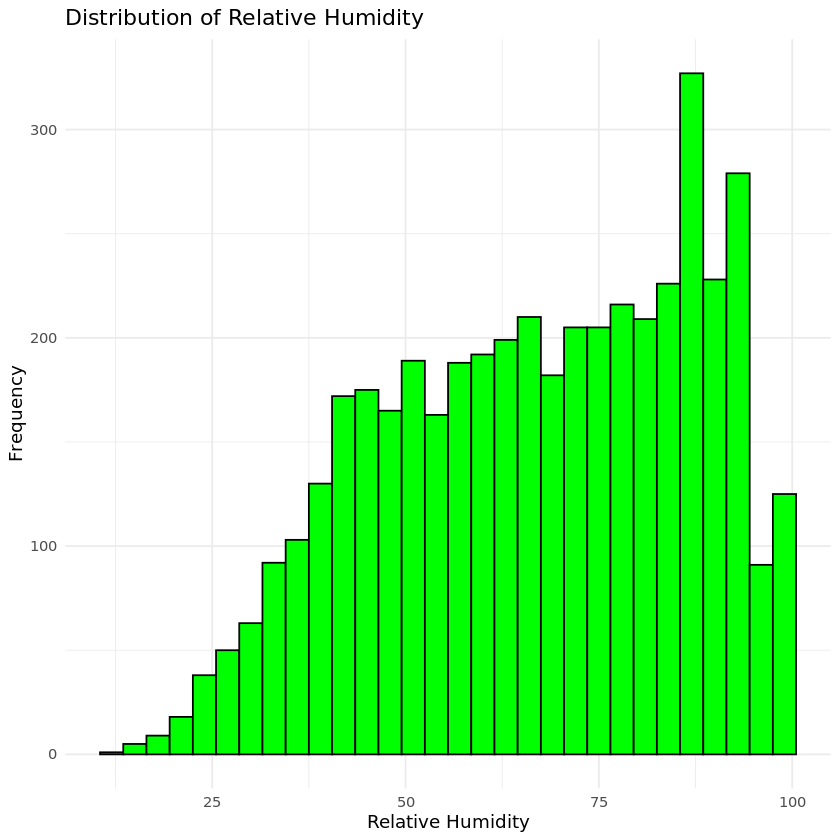

In [35]:
ggplot(train_data) +
geom_histogram(aes(x = relative_humidity), bins = 30, fill = "green", color = "black") +
  ggtitle("Distribution of Relative Humidity") +
  xlab("Relative Humidity") +
  ylab("Frequency") +
  theme_minimal()

Warning message:
“Removed 127 rows containing non-finite values (stat_bin).”

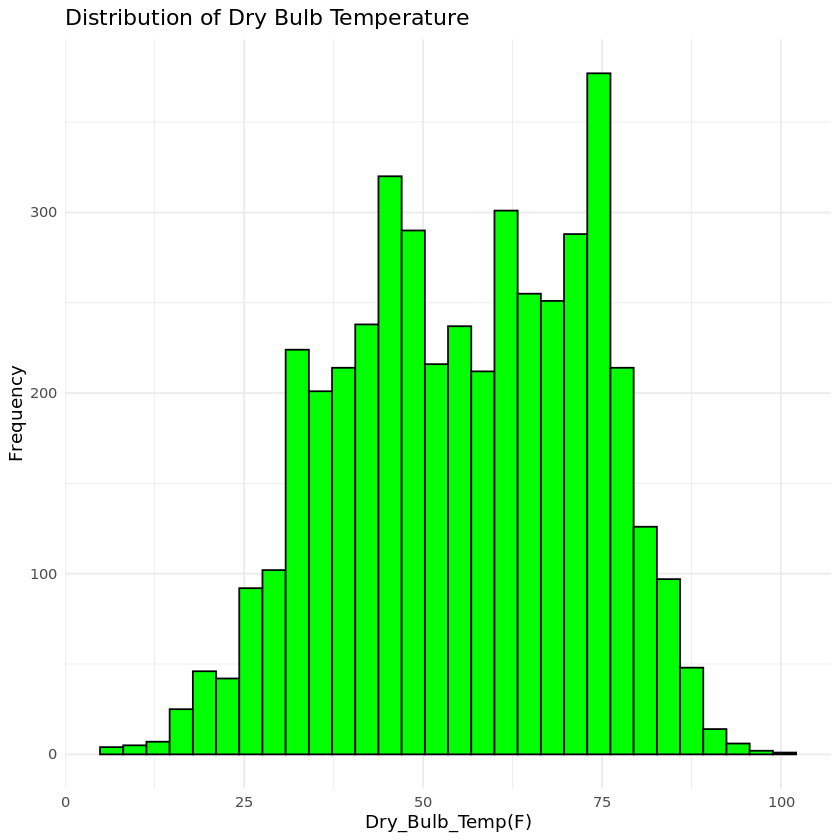

In [36]:
ggplot(train_data) +
geom_histogram(aes(x = dry_bulb_temp_f), bins = 30, fill = "green", color = "black") +
  ggtitle("Distribution of Dry Bulb Temperature") +
  xlab("Dry_Bulb_Temp(F)") +
  ylab("Frequency") +
  theme_minimal()

Warning message:
“Removed 1328 rows containing non-finite values (stat_bin).”

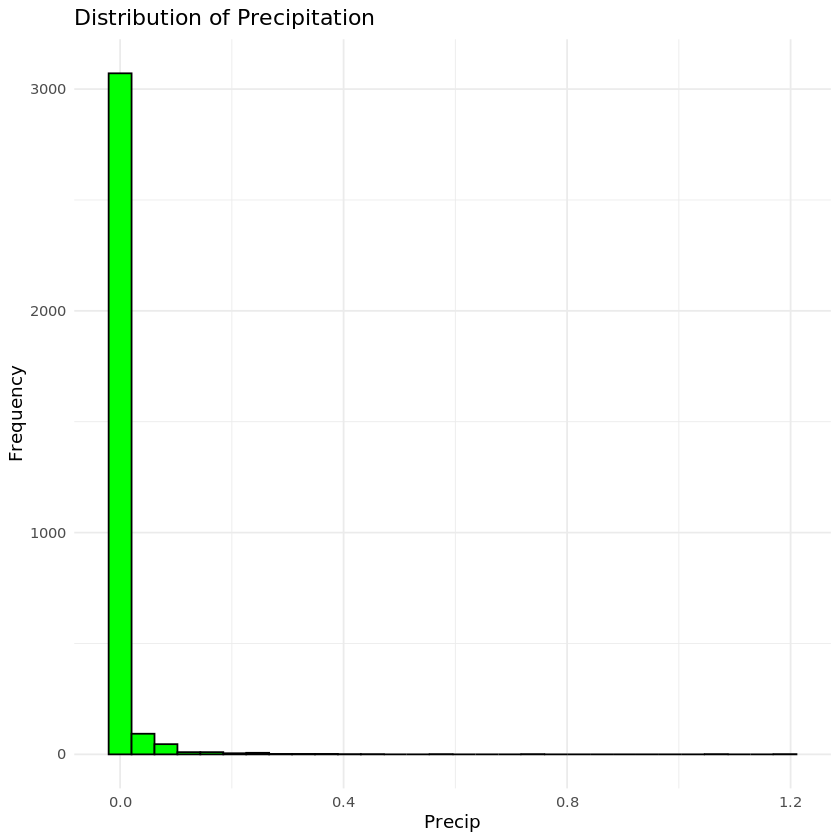

In [37]:
ggplot(train_data) +
geom_histogram(aes(x = precip), bins = 30, fill = "green", color = "black") +
  ggtitle("Distribution of Precipitation") +
  xlab("Precip") +
  ylab("Frequency") +
  theme_minimal()

Warning message:
“Removed 132 rows containing non-finite values (stat_bin).”

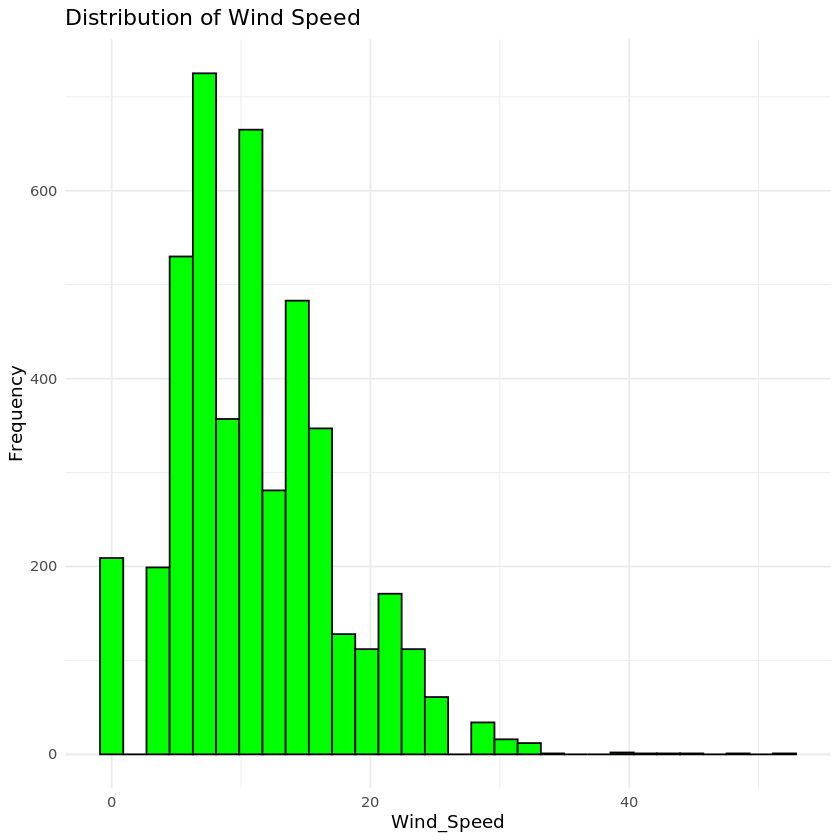

In [38]:
ggplot(train_data) +
geom_histogram(aes(x = wind_speed), bins = 30, fill = "green", color = "black") +
  ggtitle("Distribution of Wind Speed") +
  xlab("Wind_Speed") +
  ylab("Frequency") +
  theme_minimal()

Warning message:
“Removed 133 rows containing non-finite values (stat_bin).”

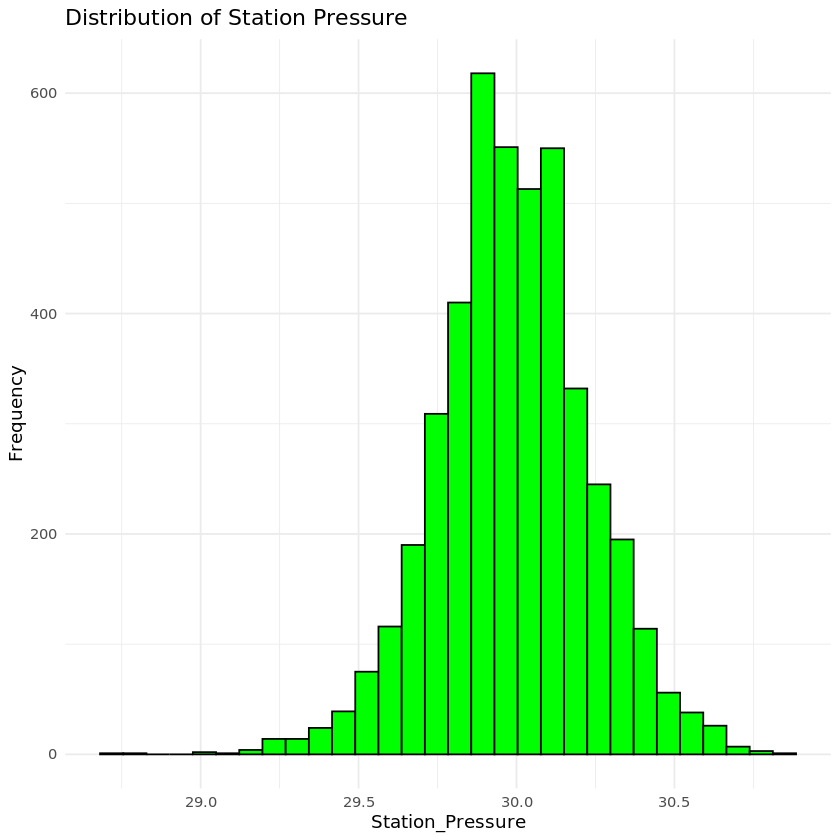

In [39]:
ggplot(train_data) +
geom_histogram(aes(x = station_pressure), bins = 30, fill = "green", color = "black") +
  ggtitle("Distribution of Station Pressure") +
  xlab("Station_Pressure") +
  ylab("Frequency") +
  theme_minimal()

<a id="cell8"></a>
## 8. Linear Regression 
After exploring the dataset more, you are now ready to start creating models to predict the precipitation (`precip`).

Create simple linear regression models where `precip` is the response variable and each of `relative_humidity`, `dry_bulb_temp_f`,`wind_speed` or `station_pressure` will be a predictor variable, e.g. `precip ~ relative_humidity`, `precip ~ dry_bulb_temp_f`, etc. for a total of four simple models. 
Additionally, visualize each simple model with a scatter plot.


`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 1328 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1328 rows containing missing values (geom_point).”

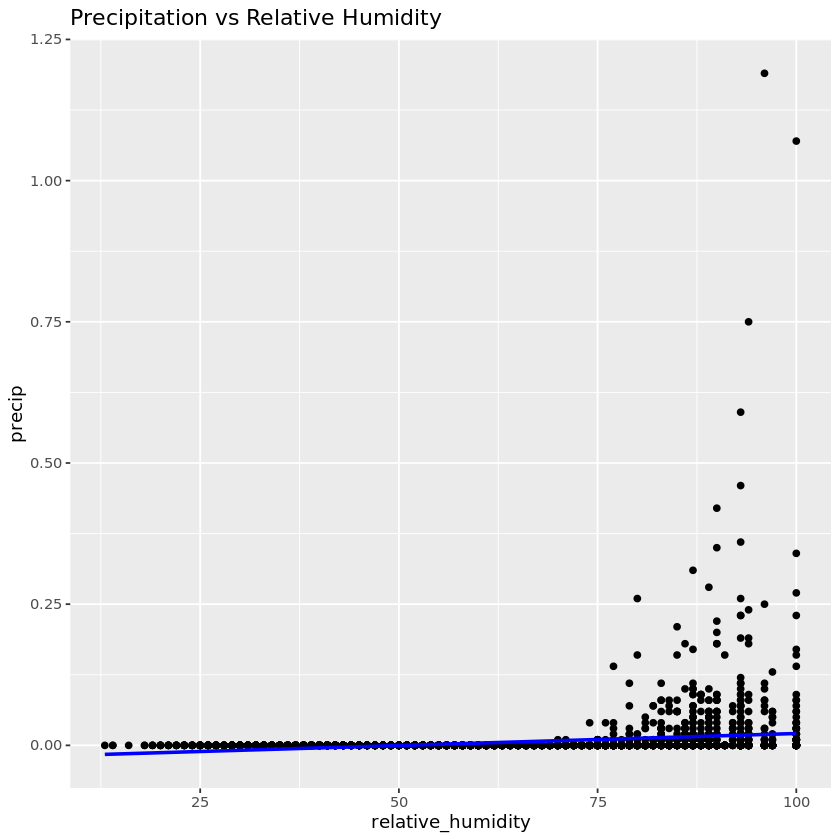

In [41]:
#precip ~ relative_humidity
linear_model_humidity <- lm(precip ~ relative_humidity, data = train_data)
ggplot(train_data, aes(x = relative_humidity, y = precip)) +
geom_point() +
geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Precipitation vs Relative Humidity")

`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 1328 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1328 rows containing missing values (geom_point).”

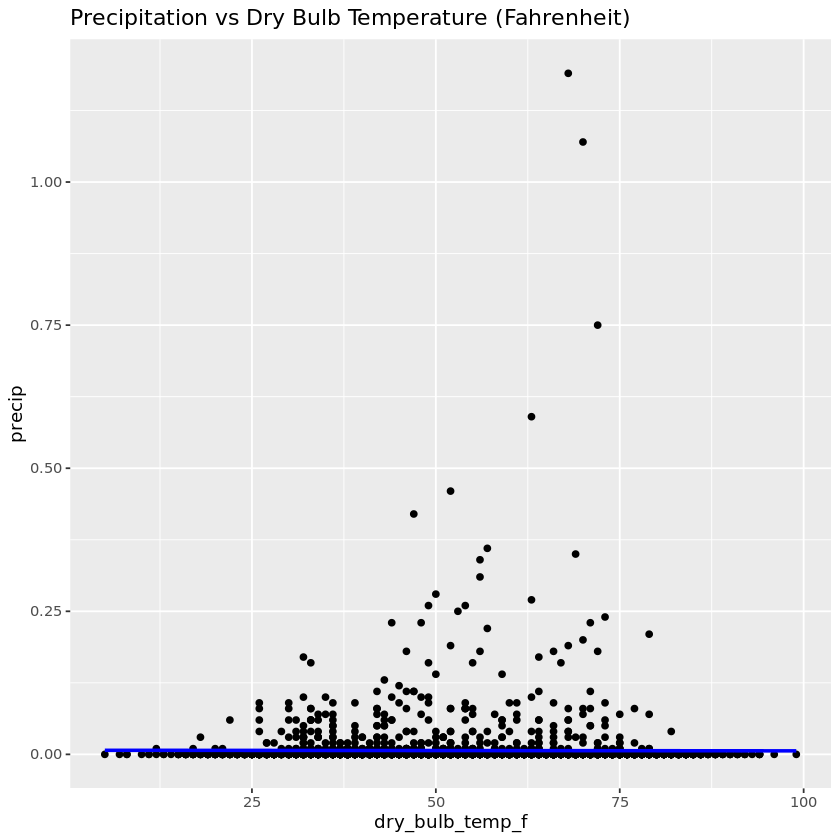

In [42]:
linear_model_drybulb <- lm(precip ~ dry_bulb_temp_f, data = train_data)
ggplot(train_data, aes(x = dry_bulb_temp_f, y = precip)) +
geom_point() +
geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Precipitation vs Dry Bulb Temperature (Fahrenheit)")

`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 1328 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1328 rows containing missing values (geom_point).”

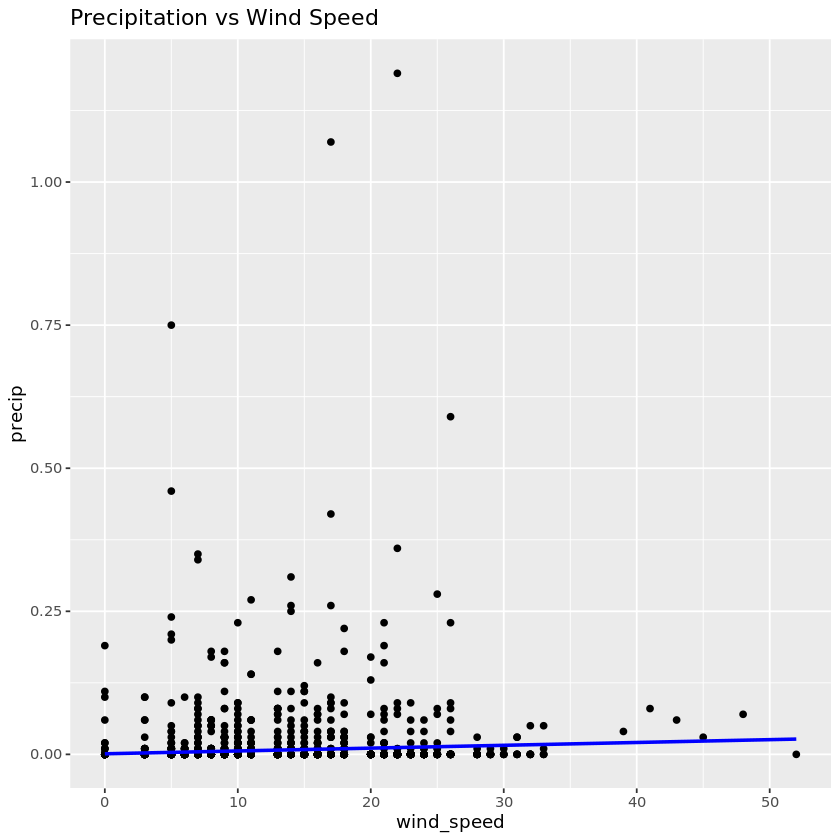

In [43]:
linear_model_wind <- lm(precip ~ wind_speed, data = train_data)

ggplot(train_data, aes(x = wind_speed, y = precip)) +
geom_point() +
geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Precipitation vs Wind Speed")

`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 1331 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1331 rows containing missing values (geom_point).”

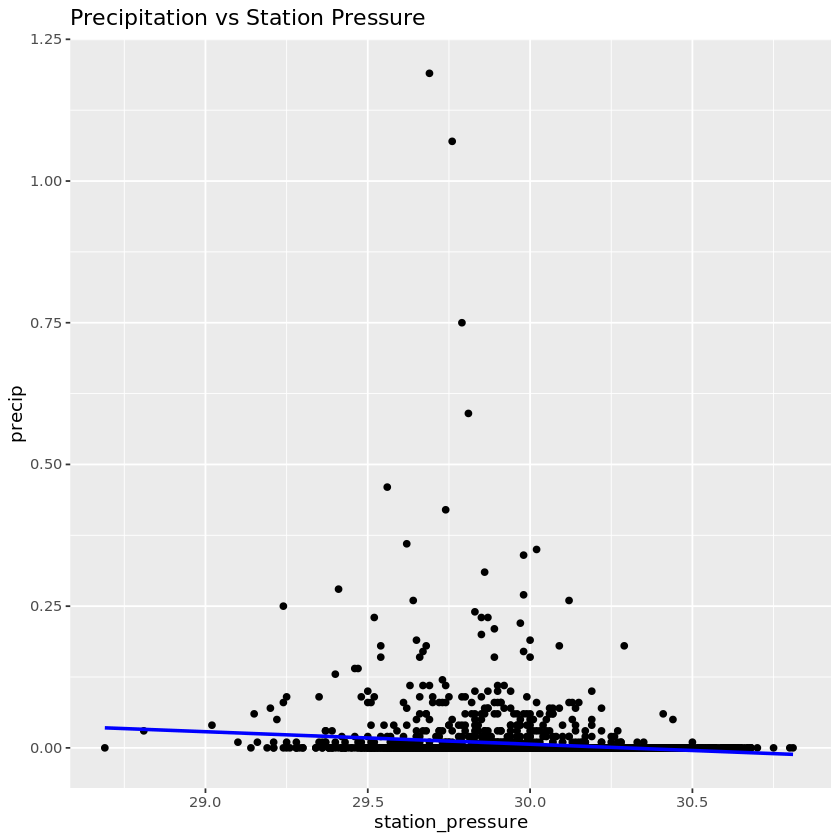

In [44]:
linear_model_station <- lm(precip ~ station_pressure, data = train_data)
ggplot(train_data, aes(x = station_pressure, y = precip)) +
geom_point() +
geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Precipitation vs Station Pressure")

In [31]:
#Summary of the five simple linear models #Determine the best predictor
###1: Relative Humidity Model:
#Estimate: 0.0004245
#R-squared: 0.0393
#p-value: < 2.2e-16

###2: Dry Bulb Temperature Model:
#Estimate: -1.043e-05
#R-squared: 1.786e-05
#p-value: 0.8096

###3: Wind Speed Model:
#Estimate: 0.0004938
#R-squared: 0.005344
#p-value: 2.994e-05

###4: Station Pressure Model:
#Estimate: -0.022077
#R-squared: 0.01591
#p-value: 5.271e-13

#Based on these summaries: Relative humidity has the highest R-squared value (0.0393)
#P-value (2.2e-16) for relative humidity is also highly significant
#This p-value suggests that the coefficient for relative humidity is significantly different from zero.
#Therefore, relative humidity is the best predictor of precipitation

#Second predictor is Station Pressure Model (significant coeffecient and higher R-squared value compared to the other predictors)

<a id="cell9"></a>
## 9. Improve the Model
Now, lets improve the simple models created in the previous section by
1. Adding more features
2. Adding a polynomial component
3. Checking each model performance using the training set and a metric like R-squared, mean squared error (MSE) or root mean squared error (RMSE)

In [45]:
#Model1: Improving the model by adding more predictors

#Step 1: Creating a multiple regression model
model1 <- lm(precip ~ relative_humidity + dry_bulb_temp_f + wind_speed + station_pressure, data = train_data)

In [47]:
#Step 2: Evaluating the multiple regression model

#Setting the engine
lm_spec <- linear_reg () %>%
set_engine (engine = "lm")

#Train-fitting the linear regression model
train_fit <- lm_spec %>%
fit (precip ~ relative_humidity + dry_bulb_temp_f + wind_speed + 
    station_pressure, data = train_data)

# Evaluating the model to estimate how the model responds
noaa_results <- train_fit %>%
  predict(new_data = train_data) %>%
  mutate(truth = train_data$precip)

# Display the results
print (head(noaa_results))

# A tibble: 6 x 2
     .pred truth
     <dbl> <dbl>
1 -0.00225  0   
2  0.0179   0   
3  0.00969  0   
4  0.00396  0   
5  0.0171   0.06
6  0.0207  NA   


In [101]:
#Step 3: Finding the R-Squared value of the train data set for the multiple linear regression model
rsq_model1_train <- rsq (noaa_results, truth = truth,, estimate = .pred)
rsq_model1_train

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.05598137


   degree adj_r_squared
1       1    0.03900170
2       2    0.06295284
3       3    0.06955124
4       4    0.06944736
5       5    0.06971578
6       6    0.07030355
7       7    0.07041457
8       8    0.07019923
9       9    0.06991262
10     10    0.06967910
[1] "Best degree: 7"


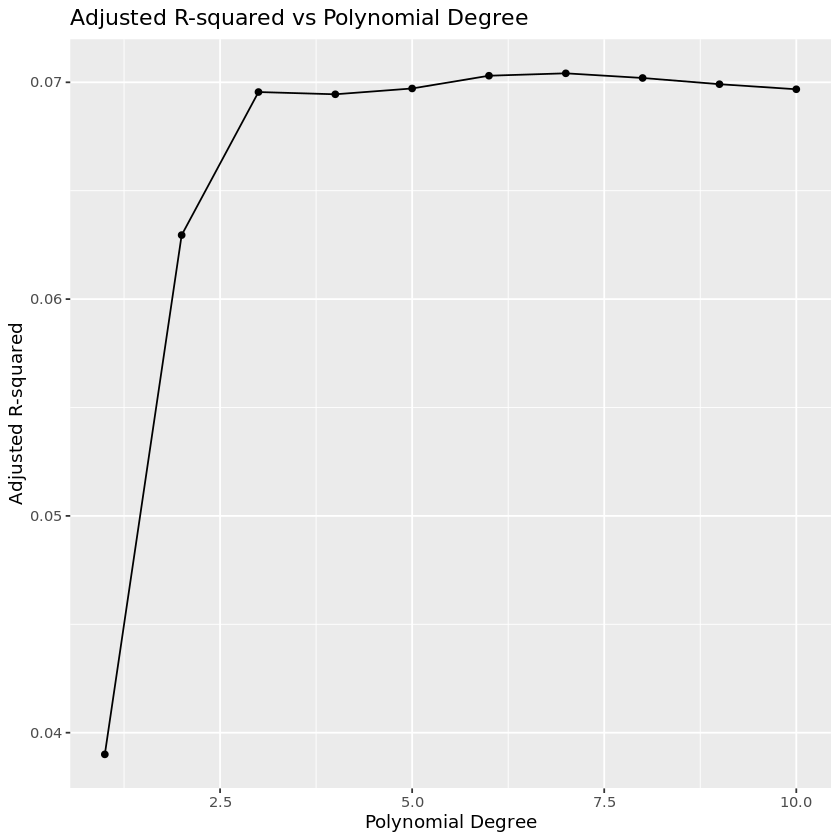

In [58]:
#Model2: Improving the model for relative humidity with polynomial terms
#Using grid-search method to find the best polynomial order for relative humidity

#load the required libraries
library(dplyr)
library(purrr)
library(broom)
library(ggplot2)

# Function to fit polynomial model and return adjusted R-squared
fit_poly_model <- function(degree, train_data) {
  model <- lm(precip ~ poly(relative_humidity, degree = degree, raw = TRUE), data = train_data)
  summary(model)$adj.r.squared
}

# Define the range of polynomial degrees to evaluate
degrees <- 1:10  # Evaluate polynomial degrees from 1 to 10

# Apply the function to each degree and collect the results
results <- map_dbl(degrees, fit_poly_model, train_data = train_data)

# Create a data frame of results
results_df <- data.frame(degree = degrees, adj_r_squared = results)

# Identify the best polynomial degree
best_degree <- results_df %>%
  filter(adj_r_squared == max(adj_r_squared)) %>%
  pull(degree)

# Print results
print(results_df)
print(paste("Best degree:", best_degree))

# Visualize the results
ggplot(results_df, aes(x = degree, y = adj_r_squared)) +
  geom_line() +
  geom_point() +
  ggtitle("Adjusted R-squared vs Polynomial Degree") +
  xlab("Polynomial Degree") +
  ylab("Adjusted R-squared")


Warning message:
“Removed 1328 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1328 rows containing missing values (geom_point).”

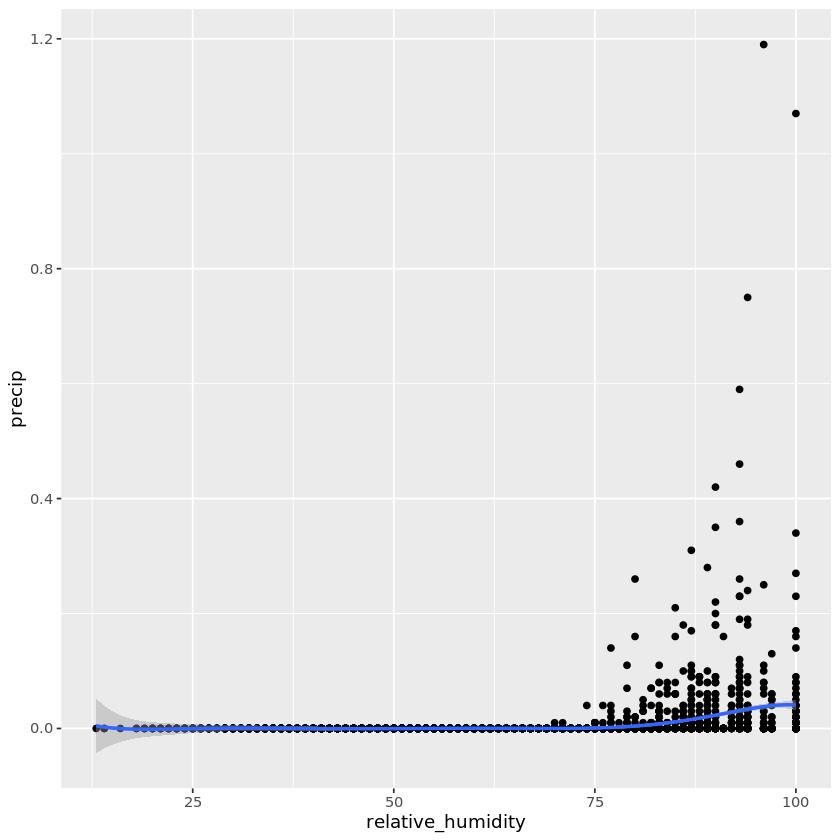

In [59]:
#lets see how the model looks 
#rename model to model for easier comparison with model1 later on
model2 <- lm(precip ~ poly(relative_humidity, degree = 7, raw = TRUE), data = train_data)
ggplot(data = train_data, aes(relative_humidity, precip))+
       geom_point() +
       geom_smooth(method = "lm", formula = y ~ poly(x,7))

In [129]:
# Setting up the polynomial regression model
lm_spec_poly <- linear_reg() %>%
  set_engine(engine = "lm")

# Train-fitting the polynomial regression model
train_fit_poly <- lm_spec_poly %>%
  fit(precip ~ poly(relative_humidity, 7, raw = TRUE), data = train_data)

# Making predictions and evaluating the model
noaa_results_poly <- train_fit_poly %>%
  predict(new_data = train_data) %>%
  bind_cols(truth = train_data$precip)  # Binding true values with predictions

# Displaying the results
print(noaa_results_poly)

# A tibble: 4,582 x 2
       .pred truth
       <dbl> <dbl>
 1 -0.000369  0   
 2  0.0205    0   
 3  0.00317   0   
 4  0.000217  0   
 5  0.0231    0.06
 6  0.00317  NA   
 7  0.000149  0   
 8 -0.000357  0   
 9  0.00962   0   
10  0.0284    0.03
# … with 4,572 more rows


In [131]:
#Step 3: Finding the R-Squared value of the train data set

#find the R_squared for the multiple linear regression model
rsq_model1_train <- rsq (noaa_results, truth = truth,, estimate = .pred)
rsq_model1_train

#Find the R-Squared values of the polynomial model

rsq_polymodel_train <- rsq (noaa_results_poly, truth = truth, estimate = .pred)
rsq_polymodel_train

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.05598137


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.07241491


   degree adj_r_squared
1       1    0.01560774
2       2    0.01663857
3       3    0.01732612
4       4    0.01732612
5       5    0.01737201
6       6    0.01737201
7       7    0.01737201
8       8    0.01737201
9       9    0.01737201
10     10    0.01717606
[1] "Best degree: 5" "Best degree: 6" "Best degree: 7" "Best degree: 8"
[5] "Best degree: 9"


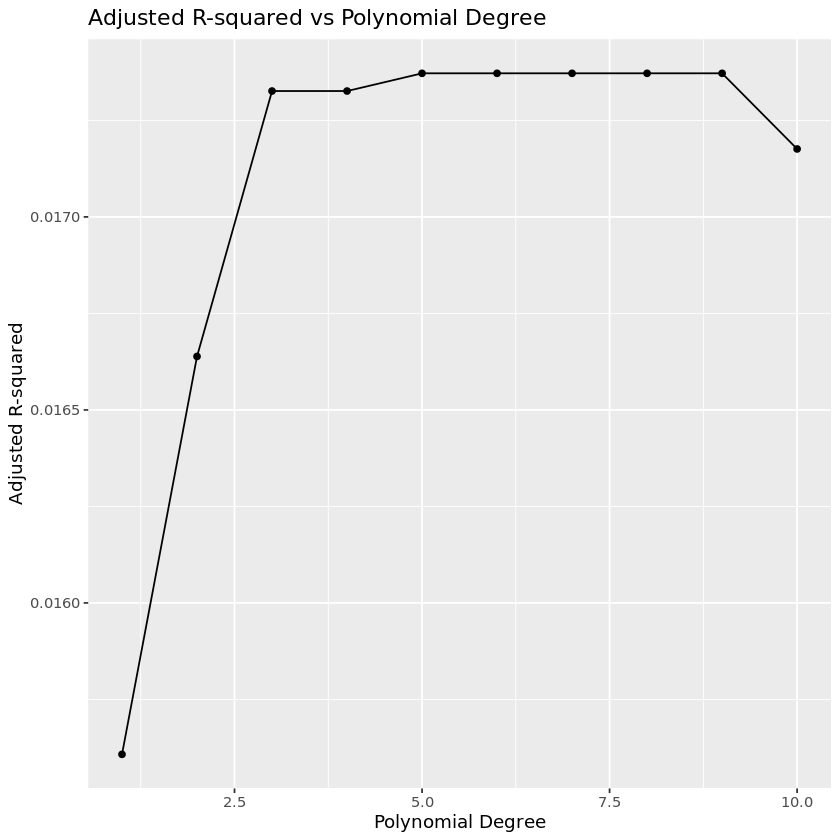

In [60]:
#Model3: Station Pressure Polynomial
#Using grid-search method to find the best polynomial order for relative humidity

# Load the required libraries
library(dplyr)
library(purrr)
library(broom)
library(ggplot2)

# Function to fit polynomial model and return adjusted R-squared
fit_poly_model2 <- function(degree, train_data) {
  model2 <- lm(precip ~ poly(station_pressure, degree = degree, raw = TRUE), data = train_data)
  summary(model2)$adj.r.squared
}

# Define the range of polynomial degrees to evaluate
degrees2 <- 1:10  # Evaluate polynomial degrees from 1 to 10

# Apply the function to each degree and collect the results
results2 <- map_dbl(degrees2, fit_poly_model2, train_data = train_data)

# Create a data frame of results
results_df2 <- data.frame(degree = degrees2, adj_r_squared = results2)

# Identify the best polynomial degree
best_degree2 <- results_df2 %>%
  filter(adj_r_squared == max(adj_r_squared)) %>%
  pull(degree)

# Print results
print(results_df2)
print(paste("Best degree:", best_degree2))

# Visualize the results
ggplot(results_df2, aes(x = degree, y = adj_r_squared)) +
  geom_line() +
  geom_point() +
  ggtitle("Adjusted R-squared vs Polynomial Degree") +
  xlab("Polynomial Degree") +
  ylab("Adjusted R-squared")

Warning message:
“Removed 1331 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1331 rows containing missing values (geom_point).”

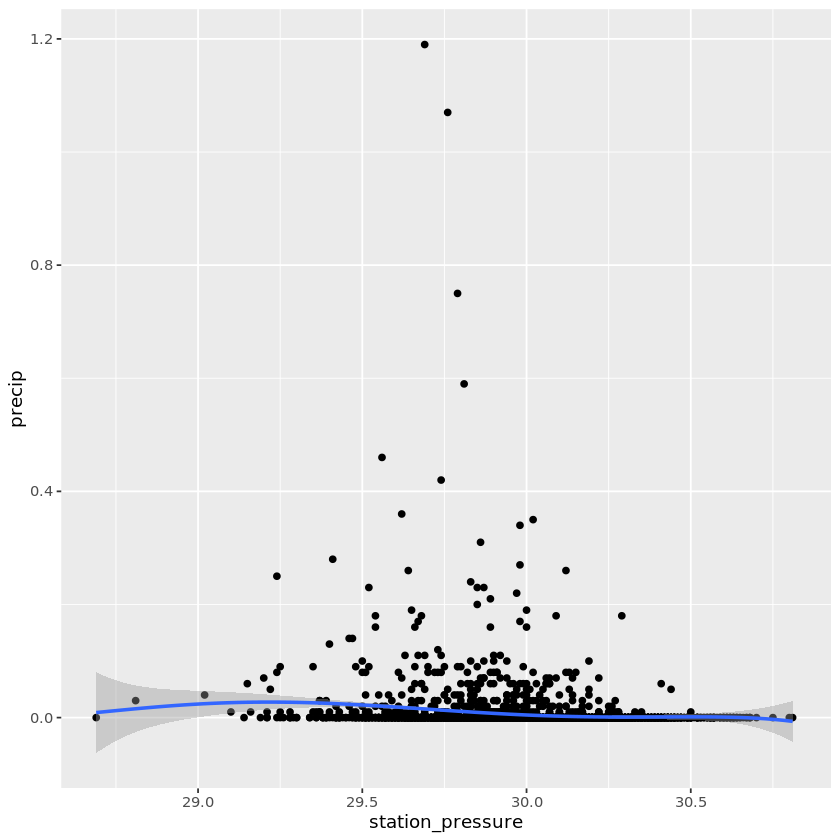

In [61]:
#let's see how the model3 looks 
#rename model to model for easier comparison with model1 and model2 later on
model3 <- lm(precip ~ poly(station_pressure, degree = 5, raw = TRUE), data = train_data)
ggplot(data = train_data, aes(station_pressure, precip))+
       geom_point() +
       geom_smooth(method = "lm", formula = y ~ poly(x,5))

In [62]:
# Setting up the polynomial regression model
lm_spec_poly2 <- linear_reg() %>%
  set_engine(engine = "lm")

# Train-fitting the polynomial regression model
train_fit_poly2 <- lm_spec_poly2 %>%
  fit(precip ~ poly(relative_humidity, 7, raw = TRUE), data = train_data)

# Making predictions and evaluating the model
noaa_results_poly2 <- train_fit_poly2 %>%
  predict(new_data = train_data) %>%
  bind_cols(truth = train_data$precip)  # Binding true values with predictions

# Displaying the results
print(noaa_results_poly2)

# A tibble: 4,582 x 2
       .pred truth
       <dbl> <dbl>
 1 -0.000369  0   
 2  0.0205    0   
 3  0.00317   0   
 4  0.000217  0   
 5  0.0231    0.06
 6  0.00317  NA   
 7  0.000149  0   
 8 -0.000357  0   
 9  0.00962   0   
10  0.0284    0.03
# … with 4,572 more rows


In [64]:
#Step 3: Finding the R-Squared value of the train data set
#Find the R-squared for the polynomial model2
rsq_polymodel_train2 <- rsq (noaa_results_poly2, truth = truth, estimate = .pred)
rsq_polymodel_train2


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.07241491


<a id="cell10"></a>
## 10. Find Best Model
Compare the regression metrics of each model from section 9 to find the best model overall. To do this, 

1. Evaluate the models on the **testing set** using at least one metric (like MSE, RMSE or R-squared).
2. After calculating the metrics on the testing set for each model, print them out in as a table to easily compare. You can use something like:
```
model_names <- c("model_1", "model_2", "model_3")
train_error <- c("model_1_value", "model_2_value", "model_3_value")
test_error <- c("model_1_value", "model_2_value", "model_3_value")
comparison_df <- data.frame(model_names, train_error, test_error)
```
3. Finally, from the comparison table you create, conclude which model performed the best.


In [74]:
#1. Evaluating the model using the test data
#model1
lm_spec2 <- linear_reg () %>%
set_engine (engine = "lm")

#Train-fitting the linear regression model
train_fit2 <- lm_spec %>%
fit (precip ~ relative_humidity + dry_bulb_temp_f + wind_speed + 
    station_pressure, data = train_data)

# Evaluating the model to estimate how the model responds
model1_test_data <- train_fit %>%
  predict(new_data = test_data) %>%
  mutate(truth = test_data$precip)

# Display the results
print(model1_test_data)

# A tibble: 1,145 x 2
       .pred truth
       <dbl> <dbl>
 1 -0.00580      0
 2  0.00248      0
 3  0.000410     0
 4 -0.0107       0
 5  0.0149      NA
 6 -0.0116       0
 7  0.00266      0
 8 -0.00580      0
 9  0.00655     NA
10  0.00599     NA
# … with 1,135 more rows


In [75]:
#1. Evaluating the model using the test data and R-squared
#model2
polynomial_model_test <- linear_reg () %>%
set_engine (engine = "lm")

train_fit_poly_test <- polynomial_model_test %>%
fit (precip~poly (relative_humidity, 7, raw = TRUE), data = train_data)

#predicting to test the poly model
poly_relative_humidity_test <- train_fit_poly_test %>%
predict (new_data = test_data) %>%
mutate (truth = test_data$precip)

print(poly_relative_humidity_test)

# A tibble: 1,145 x 2
       .pred truth
       <dbl> <dbl>
 1 -0.000327     0
 2 -0.000327     0
 3  0.000357     0
 4 -0.000160     0
 5  0.0336      NA
 6  0.000226     0
 7  0.000265     0
 8  0.000226     0
 9  0.000810    NA
10  0.00317     NA
# … with 1,135 more rows


In [76]:
#1. Evaluating the model using the test data and R-squared
#model3
# Load necessary libraries
library(parsnip)
library(dplyr)

# 1. Evaluating the model using the test data and R-squared
# model3
polynomial_model_test2 <- linear_reg() %>%
  set_engine(engine = "lm")

# Train-fitting the polynomial regression model
train_fit_poly_test2 <- polynomial_model_test2 %>%
  fit(precip ~ poly(station_pressure, 5, raw = TRUE), data = train_data)

# Predicting to test the polynomial model
poly_station_pressure_test <- train_fit_poly_test2 %>%
  predict(new_data = test_data) %>%
  mutate(truth = test_data$precip)

print(poly_station_pressure_test)

Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response"):
“prediction from a rank-deficient fit may be misleading”

# A tibble: 1,145 x 2
      .pred truth
      <dbl> <dbl>
 1 0.00416      0
 2 0.0108       0
 3 0.000612     0
 4 0.000441     0
 5 0.00725     NA
 6 0.000956     0
 7 0.00461      0
 8 0.00585      0
 9 0.000758    NA
10 0.00279     NA
# … with 1,135 more rows


In [78]:
#2. Creating a matrix to represent the best model

#Find the R-Squared values of the two models

#model1 (multiple linear regression model) based on and test data
rsq_model1_test <- rsq (model1_test_data, truth = truth, estimate = .pred)

#polynomial model based on test data

rsq_polymodel_test<- rsq (poly_relative_humidity_test, truth = truth, estimate = .pred)

#polynomial model for station pressure

rsq_polymodel_test2<- rsq (poly_station_pressure_test, truth = truth, estimate = .pred)
#print the results of the two R-squared

rsq_model1_test
rsq_polymodel_test
rsq_polymodel_test2

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.05694574


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.03630416


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.0393893


In [79]:
#create a dataframe to compare the R-squared calculated based on the testing data
model_names <- c("model1_test_data", "poly_relative_humidity_test", "poly_station_pressure_test")
train_error <- c("0.05598137", "0.07241491", "0.07241491")
test_error <- c("0.05694574", "0.03630416", "0.0393893")
comparison_df <- data.frame(model_names, train_error, test_error)
comparison_df

model_names,train_error,test_error
<fct>,<fct>,<fct>
model1_test_data,0.05598137,0.05694574
poly_relative_humidity_test,0.07241491,0.03630416
poly_station_pressure_test,0.07241491,0.0393893


In [ ]:
#3 which model performed the best?
The multiple linear regression model.
The mlr model R-squared value is slightly higher on the testing data compared to the training data, indicating that the model generalizes decently to unseen data.

The polynomial orders R-squared (for both polynomial models) values are higher on the training data compared to the testing data, suggesting they have less generalization capability.

## Author(s)

<h4> Yiwen Li </h4>

## Contributions

<h4> Tiffany Zhu </h4>

## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
